In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 데이터 불러오기
df = pd.read_csv('real_final_data.csv', encoding='utf-8-sig')

# ✅ 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

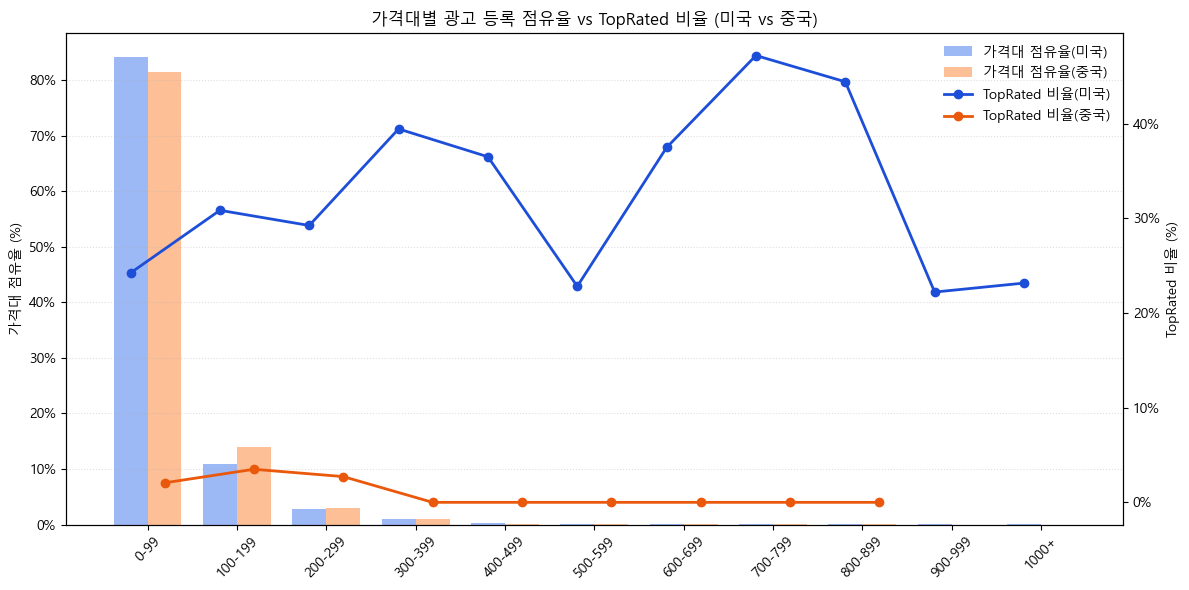

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# 1) 데이터 준비
df_ad = agg[agg['priority_label'] == '광고 있음'].copy()
df_ad['price_bin'] = df_ad['price_bin'].astype('category').cat.set_categories(price_order, ordered=True)

US, CN = 'US', 'CN'
us = df_ad[df_ad['itemLocation'] == US]
cn = df_ad[df_ad['itemLocation'] == CN]

x = np.arange(len(price_order))
width = 0.38

# 2) 가격대별 광고 등록 "점유율(%)" 계산
def share_by_bin(g, price_bins):
    total = g['total_items'].sum()
    return np.array([
        (g.loc[g['price_bin'] == b, 'total_items'].sum() / total * 100) if total > 0 else 0.0
        for b in price_bins
    ])

share_us = share_by_bin(us, price_order)
share_cn = share_by_bin(cn, price_order)

# 3) 가격대별 TopRated 비율(%) 계산
def pos_rate_by_bin(g, price_bins):
    return np.array([
        (g.loc[g['price_bin'] == b, 'positive_rate'].mean() * 100)
        for b in price_bins
    ])

rate_us = pos_rate_by_bin(us, price_order)
rate_cn = pos_rate_by_bin(cn, price_order)

# 4) 시각화
fig, ax = plt.subplots(figsize=(12,6))

# (좌축) 국가별 점유율 막대
bars_us = ax.bar(x - width/2, share_us, width=width, alpha=0.45, color='#2563EB', label='가격대 점유율(미국)')
bars_cn = ax.bar(x + width/2, share_cn, width=width, alpha=0.45, color='#F97316', label='가격대 점유율(중국)')
ax.set_ylabel('가격대 점유율 (%)')
ax.set_xticks(x)
ax.set_xticklabels(price_order, rotation=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.grid(axis='y', linestyle=':', alpha=0.4)

# (우축) TopRated 비율 선
ax2 = ax.twinx()
ax2.plot(x - width/2, rate_us, marker='o', linewidth=2, color='#1D4ED8', label='TopRated 비율(미국)')
ax2.plot(x + width/2, rate_cn, marker='o', linewidth=2, color='#EA580C', label='TopRated 비율(중국)')
ax2.set_ylabel('TopRated 비율 (%)')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# 범례: 우측 상단으로 이동
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1 + h2, l1 + l2, loc='upper right', frameon=False)

ax.set_title('가격대별 광고 등록 점유율 vs TopRated 비율 (미국 vs 중국)')
plt.tight_layout()
plt.show()


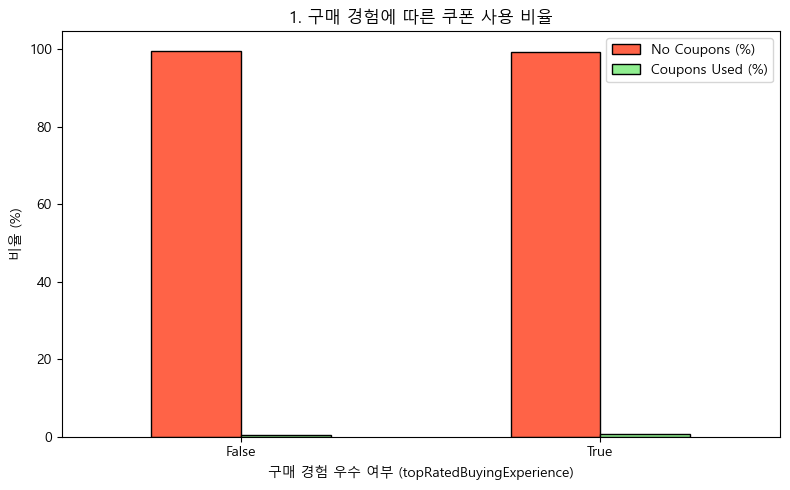

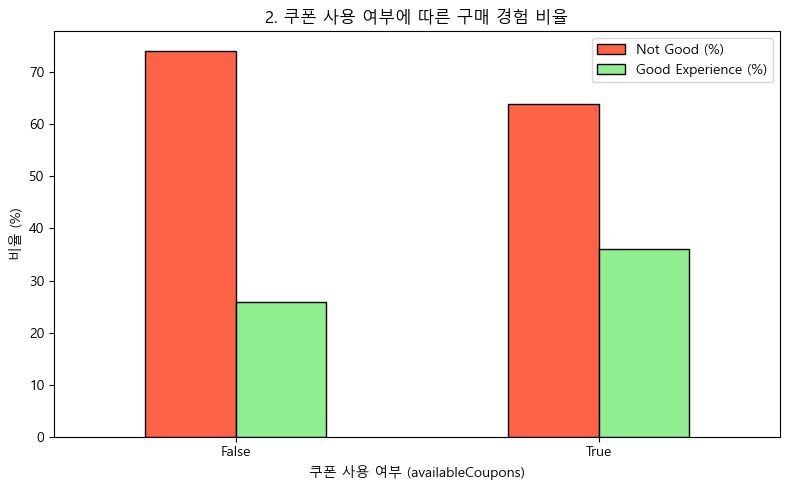

In [4]:
import matplotlib.pyplot as plt

# ✅ 1. 구매 경험에 따른 쿠폰 사용 비율 시각화
coupon_by_experience.plot(
    kind="bar",
    figsize=(8, 5),
    color=["#ff6347", "#90ee90"],  # 다홍 / 연두
    edgecolor="black"
)
plt.title("1. 구매 경험에 따른 쿠폰 사용 비율")
plt.xlabel("구매 경험 우수 여부 (topRatedBuyingExperience)")
plt.ylabel("비율 (%)")
plt.xticks(ticks=[0, 1], labels=["False", "True"], rotation=0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# ✅ 2. 쿠폰 사용 여부에 따른 구매 경험 비율 시각화
experience_by_coupon.plot(
    kind="bar",
    figsize=(8, 5),
    color=["#ff6347", "#90ee90"],  # 다홍 / 연두
    edgecolor="black"
)
plt.title("2. 쿠폰 사용 여부에 따른 구매 경험 비율")
plt.xlabel("쿠폰 사용 여부 (availableCoupons)")
plt.ylabel("비율 (%)")
plt.xticks(ticks=[0, 1], labels=["False", "True"], rotation=0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


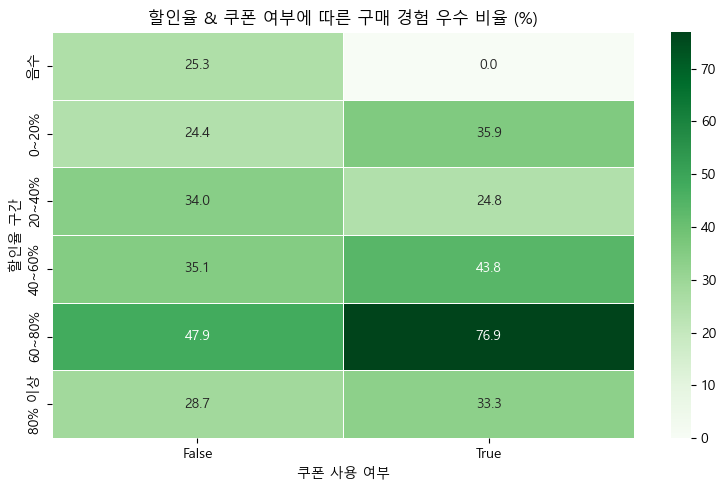

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔧 할인율 구간 정의 함수
def map_discount_range(x):
    if x < 0:
        return '음수'
    elif x < 20:
        return '0~20%'
    elif x < 40:
        return '20~40%'
    elif x < 60:
        return '40~60%'
    elif x < 80:
        return '60~80%'
    else:
        return '80% 이상'

# ✅ 구간화 및 준비
df['discount_group'] = df['discountRatio'].apply(map_discount_range)

# ✅ 그룹별 구매 경험 우수 비율 계산
pivot = (
    df.groupby(['discount_group', 'availableCoupons'])['topRatedBuyingExperience']
    .mean()
    .unstack()
    .reindex(['음수', '0~20%', '20~40%', '40~60%', '60~80%', '80% 이상'])
)

# ✅ 히트맵 시각화
plt.figure(figsize=(8, 5))
sns.heatmap(pivot * 100, annot=True, fmt=".1f", cmap="Greens", linewidths=0.5)
plt.title("할인율 & 쿠폰 여부에 따른 구매 경험 우수 비율 (%)")
plt.xlabel("쿠폰 사용 여부")
plt.ylabel("할인율 구간")
plt.tight_layout()
plt.show()


In [6]:
# ✅ 히트맵의 기반 테이블 출력 (비율 %로 보기 좋게 변환)
print("할인율 & 쿠폰 여부에 따른 구매 경험 우수 비율 (%)")
print((pivot * 100).round(2))


할인율 & 쿠폰 여부에 따른 구매 경험 우수 비율 (%)
availableCoupons  False  True 
discount_group                
음수                25.26   0.00
0~20%             24.40  35.92
20~40%            33.97  24.77
40~60%            35.05  43.75
60~80%            47.88  76.92
80% 이상            28.70  33.33


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801367 entries, 0 to 801366
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   availableCoupons          801367 non-null  bool   
 1   bidCount                  1148 non-null    float64
 2   buyingOptions             801367 non-null  object 
 3   categories                801367 non-null  object 
 4   condition                 801367 non-null  object 
 5   currentBidPrice           1148 non-null    object 
 6   itemCreationDate          801367 non-null  object 
 7   itemEndDate               1148 non-null    object 
 8   itemId                    801367 non-null  object 
 9   itemLocation              801367 non-null  object 
 10  itemOriginDate            801367 non-null  object 
 11  leafCategoryIds           801367 non-null  object 
 12  listingMarketplaceId      801367 non-null  object 
 13  price                     801367 non-null  f

c:\Temp\ipykernel_18404\330917382.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='price_bin', columns='discount_bin', values='topRatedBuyingExperience', aggfunc='mean')


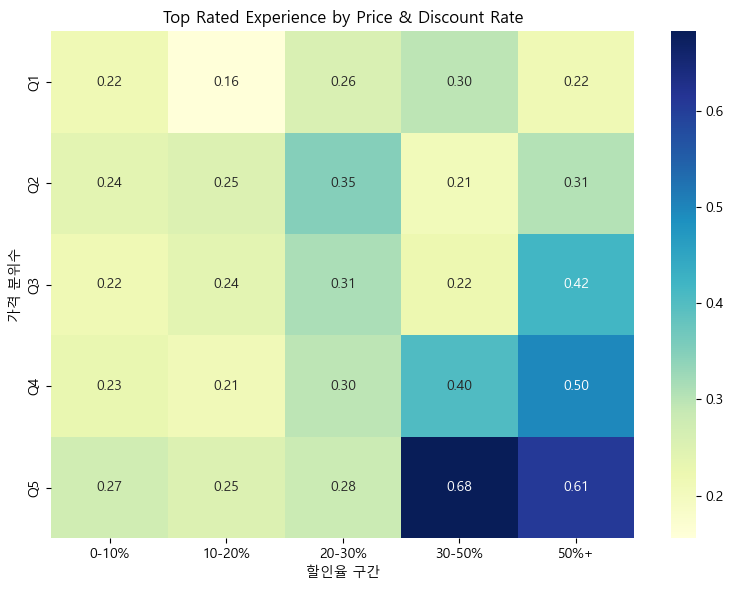

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 할인율과 가격 구간화
df['discount_bin'] = pd.cut(df['discountRatio'], bins=[0,10,20,30,50,100], labels=['0-10%','10-20%','20-30%','30-50%','50%+'])
df['price_bin'] = pd.qcut(df['price'], q=5, labels=['Q1','Q2','Q3','Q4','Q5'])  # 가격 분위수

# 피벗 테이블 생성
pivot = df.pivot_table(index='price_bin', columns='discount_bin', values='topRatedBuyingExperience', aggfunc='mean')

# 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Top Rated Experience by Price & Discount Rate")
plt.xlabel("할인율 구간")
plt.ylabel("가격 분위수")
plt.tight_layout()
plt.show()


c:\Temp\ipykernel_18404\331286241.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby(['discount_bin', 'price_bin'])['topRatedBuyingExperience'].mean().reset_index()


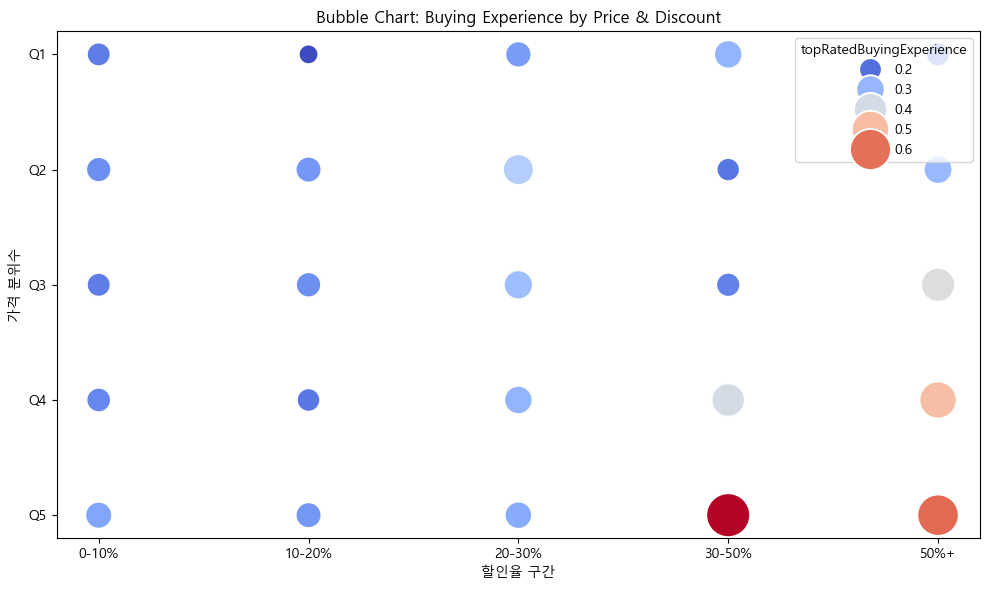

In [16]:
# 버블 차트용 데이터 준비
agg = df.groupby(['discount_bin', 'price_bin'])['topRatedBuyingExperience'].mean().reset_index()

# 버블 차트
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=agg, x='discount_bin', y='price_bin',
    size='topRatedBuyingExperience', hue='topRatedBuyingExperience',
    sizes=(200, 1000), palette='coolwarm', legend='brief'
)
plt.title("Bubble Chart: Buying Experience by Price & Discount")
plt.xlabel("할인율 구간")
plt.ylabel("가격 분위수")
plt.tight_layout()
plt.show()


c:\Temp\ipykernel_18404\3177791566.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_cat.pivot_table(index='category_1', columns='discount_bin', values='topRatedBuyingExperience', aggfunc='mean')


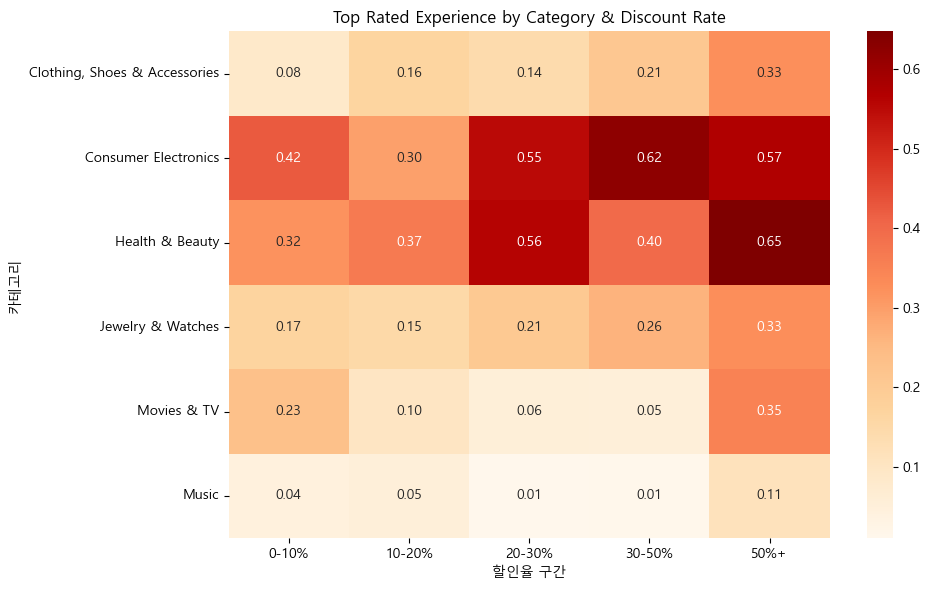

In [12]:
# 할인율 구간
df['discount_bin'] = pd.cut(df['discountRatio'], bins=[0,10,20,30,50,100], labels=['0-10%','10-20%','20-30%','30-50%','50%+'])

# 카테고리 상위 N개 선택
top_cats = df['category_1'].value_counts().nlargest(6).index
df_cat = df[df['category_1'].isin(top_cats)]

# 피벗 테이블
pivot = df_cat.pivot_table(index='category_1', columns='discount_bin', values='topRatedBuyingExperience', aggfunc='mean')

# 히트맵 시각화
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="OrRd")
plt.title("Top Rated Experience by Category & Discount Rate")
plt.xlabel("할인율 구간")
plt.ylabel("카테고리")
plt.tight_layout()
plt.show()


c:\Temp\ipykernel_18404\2669639542.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['discount_bin', 'price_bin'])['topRatedBuyingExperience'].mean().reset_index()
c:\Temp\ipykernel_18404\2669639542.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ax, (discount, data) in zip(g.axes.flat, grouped.groupby('discount_bin')):


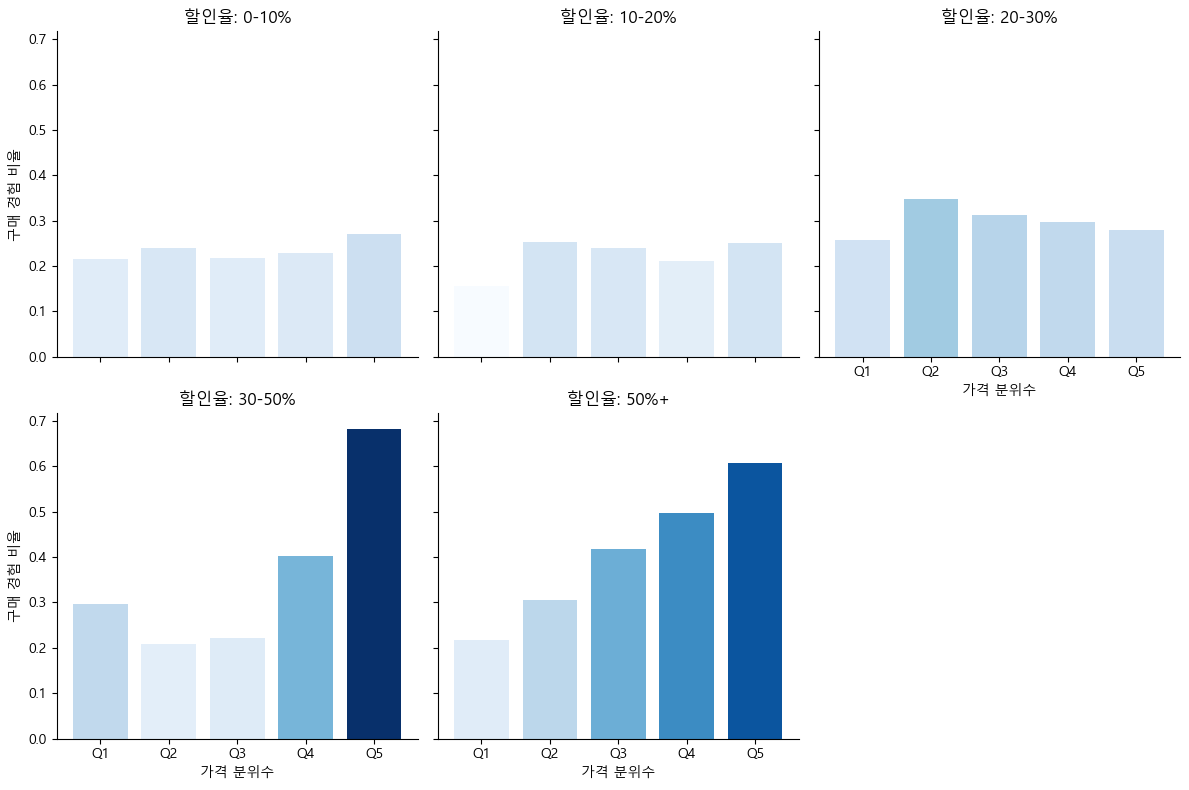

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

# 🔧 그룹화
grouped = df.groupby(['discount_bin', 'price_bin'])['topRatedBuyingExperience'].mean().reset_index()

# 🔧 정규화 및 색상 맵핑
norm = mcolors.Normalize(vmin=grouped['topRatedBuyingExperience'].min(), vmax=grouped['topRatedBuyingExperience'].max())
cmap = plt.cm.Blues  # 하늘색 계열

# 🔧 Facet 그리드 생성
g = sns.FacetGrid(grouped, col='discount_bin', col_wrap=3, height=4, sharey=True)

# 각 서브플롯에 대해 반복
for ax, (discount, data) in zip(g.axes.flat, grouped.groupby('discount_bin')):
    bars = ax.bar(
        data['price_bin'], data['topRatedBuyingExperience'],
        color=[cmap(norm(val)) for val in data['topRatedBuyingExperience']]
    )
    ax.set_title(f"할인율: {discount}")
    ax.set_xlabel("가격 분위수")
    ax.set_ylabel("구매 경험 비율")

plt.tight_layout()
plt.show()


c:\Temp\ipykernel_18404\2332195420.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['discount_bin', 'condition_Group'])['topRatedBuyingExperience'].mean().reset_index()


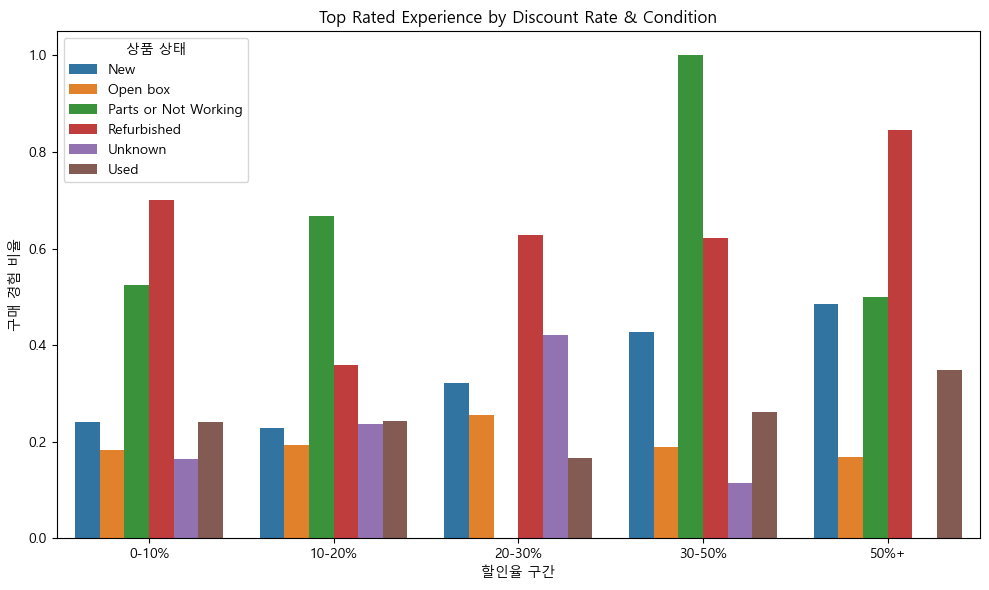

In [13]:
# 할인율 구간
df['discount_bin'] = pd.cut(df['discountRatio'], bins=[0,10,20,30,50,100], labels=['0-10%','10-20%','20-30%','30-50%','50%+'])

# 그룹별 평균 구매 경험 비율
grouped = df.groupby(['discount_bin', 'condition_Group'])['topRatedBuyingExperience'].mean().reset_index()

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='discount_bin', y='topRatedBuyingExperience', hue='condition_Group')
plt.title("Top Rated Experience by Discount Rate & Condition")
plt.xlabel("할인율 구간")
plt.ylabel("구매 경험 비율")
plt.legend(title='상품 상태')
plt.tight_layout()
plt.show()
